<a href="https://colab.research.google.com/github/root-epifit/HPC_Sber_2025/blob/main/%D0%94%D0%B71_solution_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание 1 - Часть 1

### Множество Жюлиа

Для фиксированного комплексного числа **c**, множество Жюлиа **J(c)** — это множество комплексных чисел $\mathbf{z_0}$, для которых последовательность
$$
z_{i+1} = z_i^2 + c
$$
расходится.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

1. Постройте двумерный график ( по осям **Re(z), Im(z)**), при фиксированном **c** (в примере 0.1+0.5i) с использованием 2 цветов (один цвет для сходящейся точки, другой — для расходящейся).

In [6]:
import cmath

def iterate_until_nan(z_0: complex, c: complex, max_iterations: int = 20):
    """Iteration process to see if z_0 converges or diverges
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int: zero if the iteration diverged,
             one if we reach max_iterations and we still
             haven't reached nan
    """
    # РЕАЛИЗОВАТЬ ВОТ ТУТ
    z = z_0
    try:
        for i in range(1,max_iterations + 1):
            z = z**2 + c
            if cmath.isnan(z): return 0
    except OverflowError:
        #print(f"i={i}, z={z}")
        return 1
    if cmath.isnan(z): return 0
    else: return 1 # output

def julia_convergence(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = iterate_until_nan(complex(x,y), c) # call iterate_until_nan() function
    return img

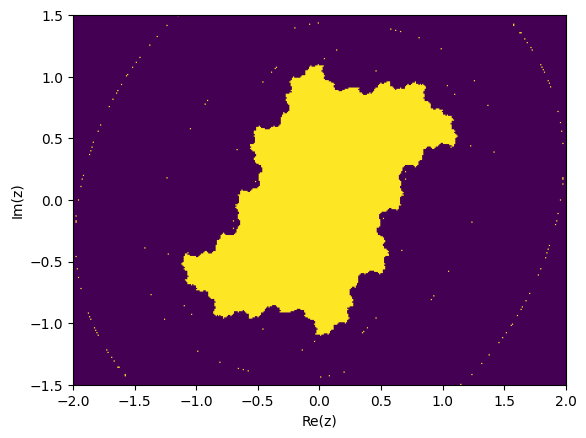

In [7]:
plt.imshow(julia_convergence(0.1+0.5j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

2. Придумайте логику из более чем двух цветов и нарисуйте картинку

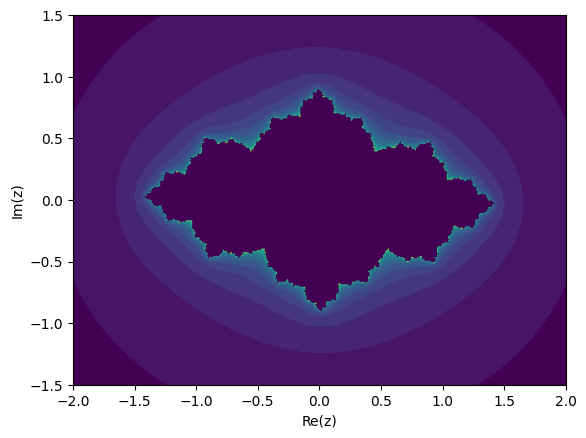

In [13]:
def julia(z_0: complex, c: complex = 1, n_iterations: int = 20):
    """Iteration process much like iterate_until_nan
       but you need think of some logic to give different
       values of z different colors
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int
    """
    # РЕАЛИЗОВАТЬ ВОТ ТУТ
    z = z_0
    try:
        for i in range(1,n_iterations + 1):
            z = z**2 + c
            if cmath.isnan(z): return 0
            if abs(z) > 4: return i
    except OverflowError:
        return 1
    if cmath.isnan(z): return 0
    else: return 1 # output

def julia_set(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = julia(complex(x,y), c) # call julia() function
    return img

plt.imshow(julia_set(-0.6-0.05j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

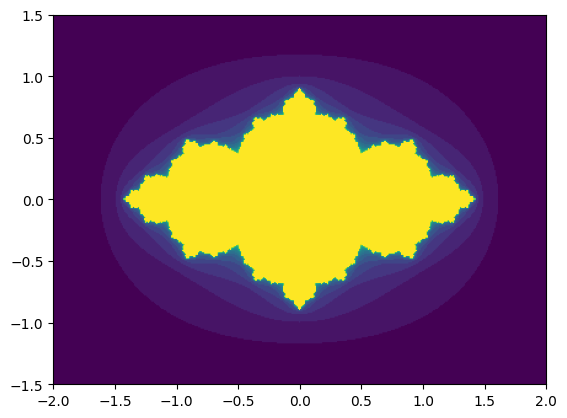

In [ ]:
# Нарисуйте похожую картинку

3. Нарисуйте множество Мандельброта (как в Википедии)

в чем разница?

Разница в том, что множество Мальдеброта строится при фиксированном z_0=(0,0) и переменных значениях коэффициента c. (Множество Жюлиа - фиксированное значение с и переменное значение z_0.)

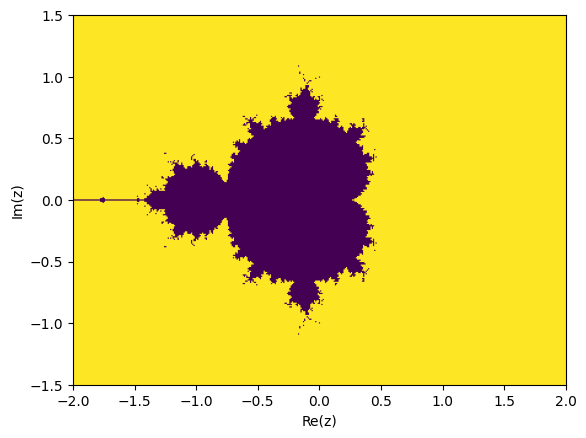

In [69]:
# Напишите здесь код
def julia(z_0: complex =0, c: complex = 1, n_iterations: int = 20):
    """Iteration process much like iterate_until_nan
       but you need think of some logic to give different
       values of z different colors
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int
    """
    # РЕАЛИЗОВАТЬ ВОТ ТУТ
    z = z_0
    try:
        for i in range(1,n_iterations + 1):
            z = z**2 + c
            #if cmath.isnan(z): return 0
            if abs(z) > 2: return 1
    except OverflowError:
        return 1
    return 0

def julia_set(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = julia(complex(0,0), complex(x,y)) # call julia() function
    return img

plt.imshow(julia_set(-0.5+0.5j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

## Домашнее задание 1 - Часть 2

### профилировка

При запуске файла **script.py** выполняется некий расчет:

In [9]:
!python script.py

Выходные данные были обрезаны до нескольких последних строк (5000).
    53    109.7 MiB      0.0 MiB           1       temp = np.empty(A.shape, dtype = float)
    54    109.7 MiB      0.0 MiB           1       potential = np.zeros(A.shape, dtype = float)
    55    110.0 MiB      0.0 MiB           2       for j in range(len(m)):
    56    110.0 MiB      0.2 MiB           1           potential += m[j]*np.cos(q[j]*numpy_x[j])
    57                                                 
    58    110.0 MiB      0.0 MiB           1       potential *= np.cos(Om*i*dt)
    59    110.4 MiB      0.5 MiB           1       temp = np.exp(((1. - np.abs(A)**2)*gamma + 4.j*potential) * dt)
    60    110.4 MiB      0.0 MiB           1       return A*temp


Filename: /content/script.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    62    109.7 MiB    109.7 MiB           1   @profile
    63                                         def computation_loop(A, i, m, q, Om, multiplier, dt):
    64

После выполнения расчета сохраняется картинка

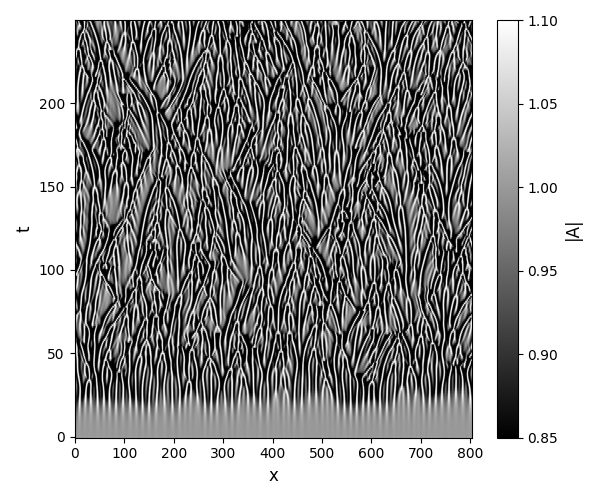

In [10]:
from PIL import Image

img = Image.open("./res.png")
display(img)

Задания:
1. Нарисовать график потребления памяти от времени исполнения **script.py**.
2. В файле **script.py** определены 8 функций. Построить график, наглядно демонстрирующий сколько времени проводится внутри каждой из этих 8 функций.  
   Если вызывается функция, которая вложена в другую, то время исполнения засчитывается обеим функциям
3. В файле **script.py** есть параметр **N**. Что будет с полной используемой памятью и временем исполнения если поварьировать этот параметр? Покажите, построив график. (Только уберите перед этим вызов функции **plot_1D_heatmap**)

Можно пользоваться любыми профилировщиками, вот примеры:
1. https://pypi.org/project/scalene/0.9.15/
2. https://docs.python.org/3/library/profile.html#module-profile
3. https://pypi.org/project/memory-profiler/

In [39]:
# Надо скопировать из git-репозитория файлы: script.py, script_N.py
!git clone https://github.com/root-epifit/HPC_Sber_2025.git

fatal: destination path 'HPC_Sber_2025' already exists and is not an empty directory.


In [40]:
!cp ./HPC_Sber_2025/script.py ./script.py
!cp ./HPC_Sber_2025/script_N.py ./script_N.py

1. График потребления памяти

In [1]:
!pip install -U memory_profiler
from PIL import Image

In [41]:
!mprof run script.py >>/dev/null

100% 1250/1250 [00:50<00:00, 24.58it/s]


Using last profile data.


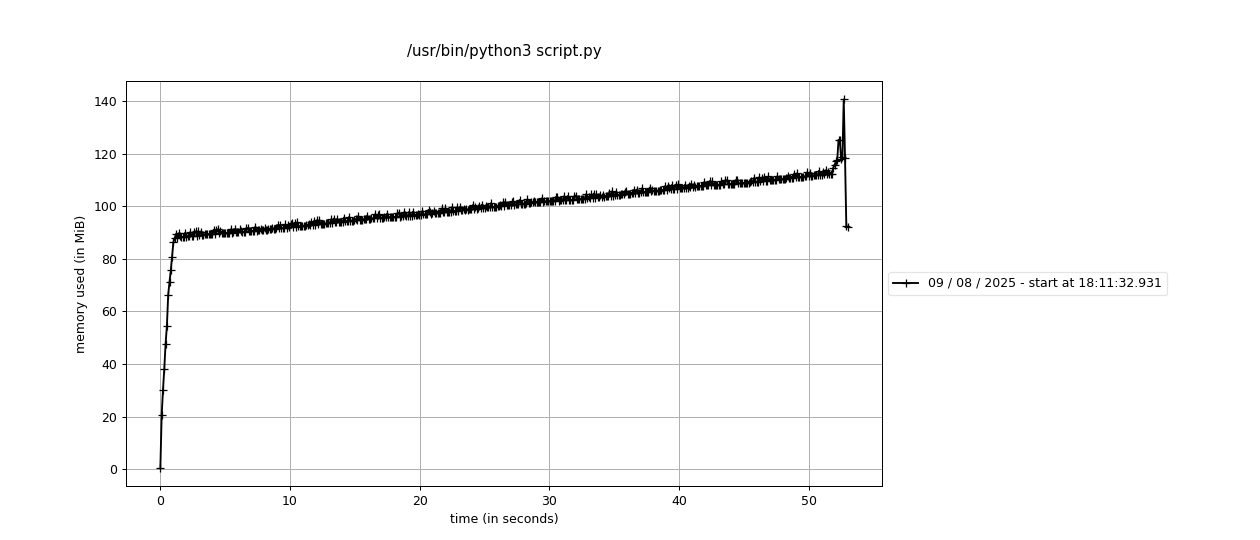

In [42]:
!mprof plot -n -o mprof_res.png

img = Image.open("./mprof_res.png")
display(img)

2. В файле script.py определены 8 функций. Построить график, наглядно демонстрирующий сколько времени проводится внутри каждой из этих 8 функций.

Using last profile data.


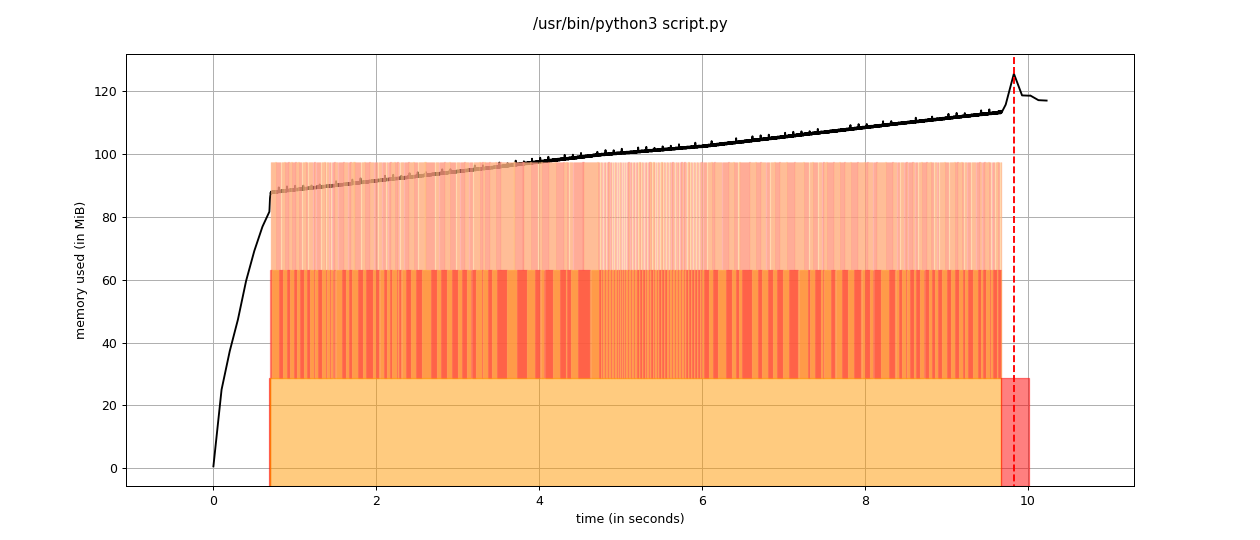

In [32]:
# В виде ступенчатого графика. Время нахождения в функции показывается вертикальной палкой

!mprof plot -f -o mprof_res_2.png

img = Image.open("./mprof_res_2.png")
display(img)

Using last profile data.


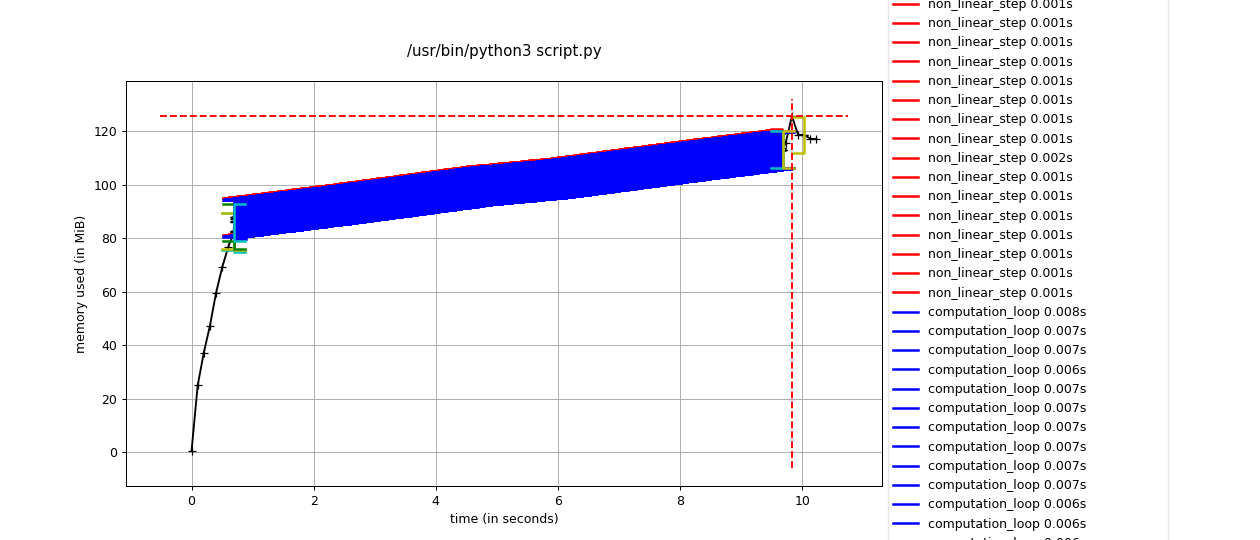

In [33]:
# В виде графика с отметками [ и ], видимо лучше для каждой функции построить свой график.
# для этого убрать из scrypt.py декоратор @profile для других функций

!mprof plot -o mprof_res_3.png

img = Image.open("./mprof_res_3.png")
display(img)

3. В файле script.py есть параметр N. Что будет с полной используемой памятью и временем исполнения если поварьировать этот параметр? Покажите, построив график. (Только уберите перед этим вызов функции plot_1D_heatmap)

In [15]:
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from script_N import run_wrapper

# Список значений параметра n
n_values = range(12871, 12890, 2)

# Списки для хранения времени выполнения и использования памяти
execution_times = []
memory_usages = []

# Запуск тестов
for n in n_values:
    start_time = time.time()

    # Измеряем использование памяти
    mem_usage = memory_usage((run_wrapper, (n,)), max_usage=True)

    execution_time = time.time() - start_time

    execution_times.append(execution_time)
    memory_usages.append(mem_usage)  # Сохраняем максимальное использование памяти

n=12871, N=12871
dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 107.16it/s]


n=12873, N=12873
dx: 0.06248040081720774
k_max:  8.001887831636608
k_min:  -8.001887831636608
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:10<00:00, 115.25it/s]


n=12875, N=12875
dx: 0.06247069436994934
k_max:  8.003131229625696
k_min:  -8.003131229625696
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:05<00:00, 210.00it/s]


n=12877, N=12877
dx: 0.06246099093812063
k_max:  8.004374627605992
k_min:  -8.004374627605992
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 106.05it/s]


n=12879, N=12879
dx: 0.06245129052018683
k_max:  8.005618025594138
k_min:  -8.005618025594138
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:03<00:00, 344.94it/s]


n=12881, N=12881
dx: 0.06244159311484054
k_max:  8.006861423577757
k_min:  -8.006861423577757
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 105.88it/s]


n=12883, N=12883
dx: 0.06243189872060384
k_max:  8.00810482156643
k_min:  -8.00810482156643
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 104.67it/s]


n=12885, N=12885
dx: 0.06242220733616932
k_max:  8.009348219547991
k_min:  -8.009348219547991
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 106.08it/s]


n=12887, N=12887
dx: 0.06241251896005906
k_max:  8.010591617532258
k_min:  -8.010591617532258
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 105.44it/s]


n=12889, N=12889
dx: 0.06240283359085197
k_max:  8.011835015521871
k_min:  -8.011835015521871
dt: 0.1033418636049274
period: 5 n_frames: 250


100%|██████████| 1250/1250 [00:11<00:00, 106.11it/s]


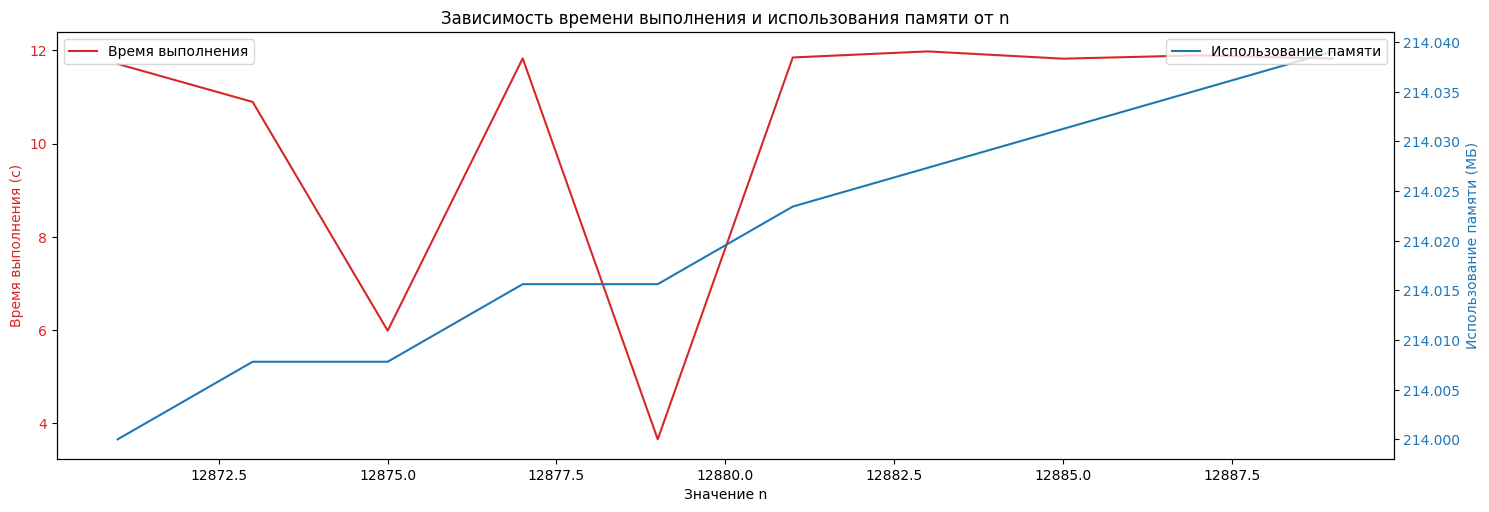

In [20]:
# Построение графиков
fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:red'
ax1.set_xlabel('Значение n')
ax1.set_ylabel('Время выполнения (с)', color=color)
ax1.plot(n_values, execution_times, color=color, label='Время выполнения')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Создаем второй ось y
color = 'tab:blue'
ax2.set_ylabel('Использование памяти (МБ)', color=color)
ax2.plot(n_values, memory_usages, color=color, label='Использование памяти')
ax2.tick_params(axis='y', labelcolor=color)

# Для добавления легенды
fig.tight_layout()  # Подгонка графиков
plt.title('Зависимость времени выполнения и использования памяти от n')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
n=12871, N=12871
dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:14<00:00, 86.11it/s]
n=12873, N=12873
dx: 0.06248040081720774
k_max:  8.001887831636608
k_min:  -8.001887831636608
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:10<00:00, 117.53it/s]
n=12875, N=12875
dx: 0.06247069436994934
k_max:  8.003131229625696
k_min:  -8.003131229625696
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:05<00:00, 238.34it/s]
n=12877, N=12877
dx: 0.06246099093812063
k_max:  8.004374627605992
k_min:  -8.004374627605992
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:11<00:00, 107.94it/s]
n=12879, N=12879
dx: 0.06245129052018683
k_max:  8.005618025594138
k_min:  -8.005618025594138
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:03<00:00, 350.29it/s]
n=128

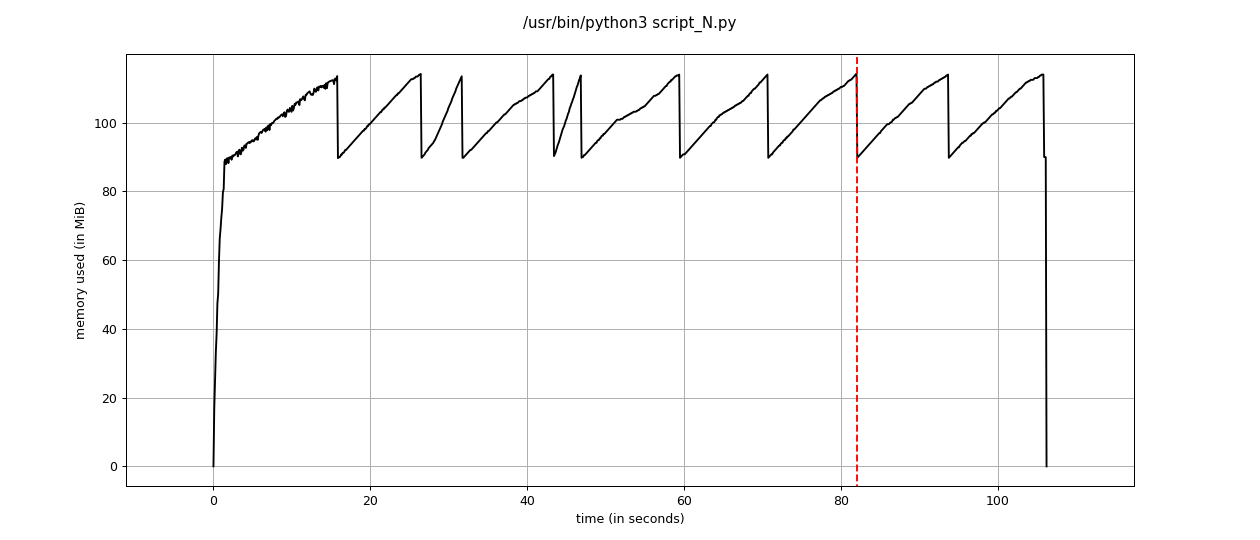

In [12]:
# Пробуем только с помощью mprof. Ширина зубцов пилы показывает время исполнения

!mprof run script_N.py
!mprof plot -f -o mprof_res_4.png

img = Image.open("./mprof_res_4.png")
display(img)